In [21]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
import pickle

In [2]:
# Reading data
df = pd.read_csv('Possum (Wild Life Animal).csv', index_col=0)

In [3]:
df.head(10)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0


In [4]:
df.shape

(104, 13)

In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


In [6]:
# Data description
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [7]:
# Checking if null values exist.
df.isnull().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
# To handle null values.
df['age'] = df['age'].fillna(np.mean(df['age']))
df['footlgth'] = df['footlgth'].fillna(np.mean(df['footlgth']))

In [9]:
# Handling categorical values.
ord_enc = OrdinalEncoder()
df[["Pop", "sex"]] = ord_enc.fit_transform(df[["Pop", "sex"]])

In [10]:
df.head(10)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,0.0,1.0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,0.0,0.0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,0.0,0.0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,0.0,0.0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,0.0,0.0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
6,1,0.0,0.0,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
7,1,0.0,1.0,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
8,1,0.0,0.0,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
9,1,0.0,0.0,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0


In [11]:
# To get the correlation between the age and all other columns.
correlations = df.corrwith(df['age'])

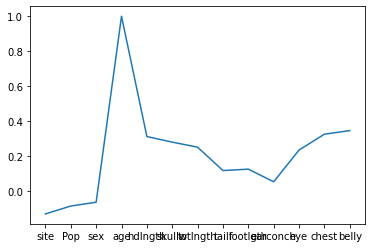

In [12]:
# Plotting the correlations.
plt.plot(correlations)

In [13]:
correlations

site       -0.130799
Pop        -0.085747
sex        -0.063995
age         1.000000
hdlngth     0.311848
skullw      0.279955
totlngth    0.250970
taill       0.117274
footlgth    0.125314
earconch    0.052943
eye         0.234669
chest       0.325303
belly       0.345825
dtype: float64

In [14]:
# Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,0.892326,0.232817,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,-0.781171,-0.790716,-0.036987,-0.345494,-0.175266
Pop,0.892326,1.000000,0.195811,-0.085747,0.001267,0.065908,-0.078666,0.490856,-0.788286,-0.883293,0.148594,-0.194957,-0.024788
sex,0.232817,0.195811,1.000000,-0.063995,0.107200,0.080014,-0.160200,-0.040917,-0.122964,-0.091559,0.188371,-0.139074,-0.090777
age,-0.130799,-0.085747,-0.063995,1.000000,0.311848,0.279955,0.250970,0.117274,0.125314,0.052943,0.234669,0.325303,0.345825
hdlngth,-0.163646,0.001267,0.107200,0.311848,1.000000,0.710827,0.691094,0.287429,0.388941,0.121463,0.347175,0.631498,0.562663
skullw,-0.083548,0.065908,0.080014,0.279955,0.710827,1.000000,0.526413,0.255921,0.275057,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.260843,-0.078666,-0.160200,0.250970,0.691094,0.526413,1.000000,0.565646,0.442866,0.154484,0.247786,0.577890,0.519465
taill,0.380444,0.490856,-0.040917,0.117274,0.287429,0.255921,0.565646,1.000000,-0.126235,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.781171,-0.788286,-0.122964,0.125314,0.388941,0.275057,0.442866,-0.126235,1.000000,0.768986,0.005197,0.450590,0.301736
earconch,-0.790716,-0.883293,-0.091559,0.052943,0.121463,-0.000537,0.154484,-0.385136,0.768986,1.000000,-0.165092,0.199230,0.066527


In [15]:
# Dropping site column as it does not has much correlation.
df = df.drop(['site', 'Pop'], axis=1)

In [24]:
df.shape

(104, 11)

In [16]:
# Initializing model
kmeans = KMeans(n_clusters=9, random_state=0).fit(df)

In [17]:
# Labels
label = kmeans.labels_

In [18]:
label

array([5, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 4, 5, 0, 0, 0, 0, 0,
       0, 4, 0, 5, 4, 4, 4, 4, 0, 0, 4, 4, 5, 5, 4, 4, 8, 4, 1, 8, 4, 8,
       4, 4, 3, 2, 2, 3, 2, 7, 3, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 6, 6, 6, 3, 3, 3, 6, 6, 6, 3, 6, 6, 6, 3, 6, 7, 3,
       2, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 3, 1, 3], dtype=int32)

In [23]:
# save the model to disk
filename = 'model.sav'
pickle.dump(kmeans, open(filename, 'wb'))